# Sprawozdanie 6
Katarzyna Nyznar

In [2]:
from math import *
from numpy import *
from numpy.linalg import inv
from scipy.linalg import *
import time
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import newton
from scipy.stats import norm
from scipy import interpolate

Zadanie 1

In [3]:
f = lambda x: e**(-2*x)

#rozwiązanie analityczne
analitycznie = (-0.5*e**(-2)) + 0.5

#metoda prostokatow 
def prost(xp, xk, f):
    return (xk-xp) * f((xp+xk)/2)

#metoda trapezow
def trap(xp, xk, f):
    return 0.5 * (xk-xp) * (f(xp)+f(xk))

#metoda Simpsona
def simpson1(xp, xk, f):
    return (1/6) * (xk-xp)*(f(xp) + 4*f((xp+xk)/2) + f(xk))

# metoda trapezów (złożona)
def trapezow(xp, xk, n, f):
    suma = 0
    dx = (xk - xp) / n

    for i in range(n):
        xk = xp + dx
        suma += (f(xp) + f(xk))
        xp += dx
    suma *= dx / 2
    return suma

# metoda Simpsona (złożona)
def simpson(xp, xk, n, f):
    dx = (xk - xp) / n
    wynik = 0
    suma = 0
    for i in range(1, n+1):
        x = xp + dx*i
        suma += f(x - dx/2)
        if i < n:
            wynik += f(x)
    wynik = dx/6*(f(xp) + f(xk) + 2 *wynik + 4*suma)
    return wynik

integral_romberg = integrate.romberg(f, 0, 1)
integral_quad = integrate.quad(f, 0, 1)

print(analitycznie, " - metoda analityczna")
print(prost(0, 1, f), " - metoda prostokątów")
print(trap(0, 1, f), " - prosty wzór trapezów")
print(simpson1(0, 1, f), " - prosty wzór simpsona")
print(trapezow(0, 1, 10, f), " - złożony wzór trapezów")
print(simpson(0, 1, 10, f), " - złożony wzór simpsona")
print(integral_romberg, " - metoda integrate.romberg")
print(integral_quad[0], " - metoda integrate.quad")


0.43233235838169365  - metoda analityczna
0.36787944117144233  - metoda prostokątów
0.5676676416183064  - prosty wzór trapezów
0.4344755079870637  - prosty wzór simpsona
0.4337725064184668  - złożony wzór trapezów
0.432332598280703  - złożony wzór simpsona
0.432332358382  - metoda integrate.romberg
0.4323323583816936  - metoda integrate.quad


Wynik najbardziej zbliżony do analitycznego otrzymujemy metodą złożonego wzoru Simpsona, a także metodami wbudowanymi integrate.romberg i integrate.quad

Najbardziej odbiegające wyniki zwraca metoda prostokątów i prosty wzór trapezów

Zadanie 2

In [7]:
funkcja_calki = lambda t: e**((-t**2)/2)/(sqrt(2*pi))

def T(x):
    return trapezow(0, x, 10, funkcja_calki) - 0.45

def S(x):
    return simpson(0, x, 10, funkcja_calki) - 0.45

wart_referencyjna = norm.ppf(0.95)
print("Wartosc referencyjna: ", wart_referencyjna)

xS = newton(S, 0.5, funkcja_calki,tol=10**(-5))
print("Wynik dla złożonego wzoru Simpsona: ", xS)
xT = newton(T, 0.5, funkcja_calki,tol=10**(-5))
print("Wynik dla złożonego wzoru trapezów: ", xT)

Wartosc referencyjna:  1.64485362695
Wynik dla złożonego wzoru Simpsona:  1.64485350545
Wynik dla złożonego wzoru trapezów:  1.6485764168


Zadanie 3

In [8]:
czas = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0]
przyspieszenie = [-4.5, -4.5, -2.3, -1.0, -0.5, 0.0]

a = interpolate.interp1d(czas, przyspieszenie)

def v(t):
    return integrate.quad(a, 0, t)[0] + abs(integrate.quad(a,0,4)[0])
def s(t):
    return integrate.quad(v, 0, t)[0]

print("v(4) = ", v(4), "m/s")

droga_hamowania = s(4)
srednia_predkosc = s(0.5) / 0.5

print("Droga hamowania: ", droga_hamowania, "m")
print("Średnia prędkość samochodu w t=[0, 0.5]: ", srednia_predkosc, "m/s")


v(4) =  0.0 m/s
Droga hamowania:  6.8249999822308585 m
Średnia prędkość samochodu w t=[0, 0.5]:  5.4750000000000005 m/s


Zadanie 4

Metoda romberga:  15.8251598855
Metoda Simpsona:  11.0634847809
Metoda trapezow:  11.0634847809


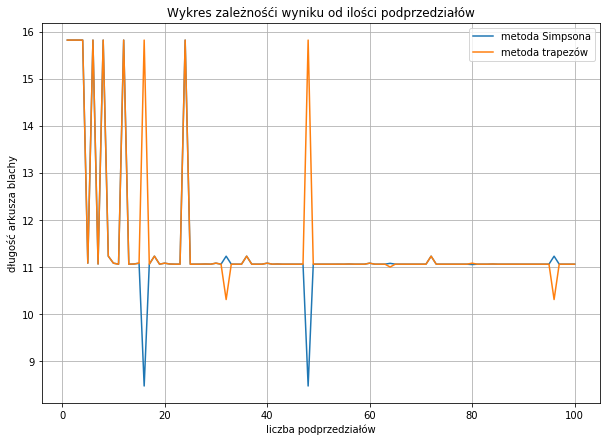

In [13]:
A = 0.1
T = 0.2
l = 4.8
f = lambda x: sqrt(1 + ((A*2*pi*cos(2*pi*x/T))/T)**2)

r = integrate.romberg(f, 0, l)
s = simpson(0, l, 100, f)
t = trapezow(0, l, 100, f)

print("Metoda romberga: ", r)
print("Metoda Simpsona: ", s)
print("Metoda trapezow: ", t)

przedzialy_s = [simpson(0, l, i, f) for i in range(1, 101)]
przedzialy_t = [trapezow(0, l, i, f) for i in range(1, 101)]

x = [i for i in range(1, 101)]
plt.figure(figsize=(10, 7))
plt.plot(x, przedzialy_s, label='metoda Simpsona')
plt.plot(x, przedzialy_t, label='metoda trapezów')
plt.grid()
plt.legend()
plt.title('Wykres zależnośći wyniku od ilości podprzedziałów')
plt.xlabel('liczba podprzedziałów')
plt.ylabel('długość arkusza blachy')
plt.show()


Im większa liczba podprzedziałów, tym dokładniejszy wynik zwracają obie metody